In [1]:

from database import Database
from scraper import scrape_character, scrape_status
from data_processor import process_character
from analytics import (get_top_xp_players, get_top_online_players, 
                      get_character_summary, get_character_delta_summary,
                      get_top_xp_delta_players)


In [2]:
db = Database('tibia_v2.db')
#db.drop_tables()
db.create_tables()


In [3]:
def scrape_and_process(db, character_name, world_name,status_data):
    print(f"\n📡 Scraping {character_name}...")
    tables = scrape_character(character_name)

    if tables:
        print(f"✅ Scraped {len(tables)} tables")
             
        # Get status data

        
        # Process the character data
        results = process_character(db, character_name, world_name, tables, status_data)
        
       
        return (character_name,True,results)
    else:
        print(f"❌ Failed to scrape {character_name}")
        return (character_name,False,None)
    #return sucess or fail
    

In [9]:
names = [
    "Andy Paladinho",
    "Bard Frozzenheart",
    "Bradokzin",
    "Capato Antiluan",
    "Geremias Coins",
    "King Bueno",
    "Legend Mgl",
    "Mariano Fegolexpatrocina",
    "Nmnmnmnmnmnmnmnmnn Luan",
    "Paraiba Returns",
    "One Acima Berserk Feroz",
    "Ack Dek",
    "Adrianoffkk",
    "Adril darion",
    "Ahrenfeld",
    "Aizen Ga",
    "Aizeng",
    "Akilles Tenente",
    "Alborotao Taoo",
    "Alfen Ruriksen",
    "Almirante Perna de Pau",
    "Almirante Uchiha",
    "Aloprado de mais",
    "Alson Menths",
    "Alta Mira",
    "Alvex Zoren",
    "Amburana",
    "Anniel",
    "Anniel Panqmeuqueixo",
    "Anniel Soconoqueixo",
    "Antthony",
    "Anya Cats",
    "Apolo Pally",
    "Aposentado Soft",
    "Aragontxz",
    "Architekt",
    "Arth Bolter",
    "Arthex Kina",
    "Arthex Magoo",
    "Artour",
    "Artrofyan",
    "Arturzin Tx",
    "Ashe Stark",
    "Astronaut Wins",
    "Atriohm",
    "Augusto Lowsby",
    "Auroria Ehpanque",
    "Awesome Relix",
    "Axufof",
    "Azar Do Rp",
    "Azellf",
    "Azkorath",
    "Babalu Opressor",
    "Babuxo",
    "Baia Irk",
    "Banzay Mage",
    "Barretoxyz",
    "Bate pouco mais Bate"
]


In [10]:

world="Auroria"
import joblib
def scrap_to_db(names):
    #joblib threads 64
    status_data = scrape_status()
    with joblib.Parallel(n_jobs=64,backend="threading") as parallel:
        results = parallel(
            joblib.delayed(scrape_and_process)(db, name, "Auroria", status_data)
            for name in names
        )
    return results

In [30]:
scrap_to_db(names)


📡 Scraping Barretoxyz...

📡 Scraping One Acima Berserk Feroz...

📡 Scraping Bard Frozzenheart...

📡 Scraping Ack Dek...

📡 Scraping Ahrenfeld...

📡 Scraping Aizeng...

📡 Scraping Geremias Coins...

📡 Scraping Capato Antiluan...

📡 Scraping Bradokzin...

📡 Scraping Alborotao Taoo...

📡 Scraping Almirante Perna de Pau...

📡 Scraping Alfen Ruriksen...

📡 Scraping Adrianoffkk...

📡 Scraping Almirante Uchiha...

📡 Scraping Legend Mgl...

📡 Scraping Alson Menths...

📡 Scraping King Bueno...

📡 Scraping Nmnmnmnmnmnmnmnmnn Luan...

📡 Scraping Aloprado de mais...

📡 Scraping Paraiba Returns...

📡 Scraping Alvex Zoren...

📡 Scraping Mariano Fegolexpatrocina...

📡 Scraping Bate pouco mais Bate...

📡 Scraping Banzay Mage...

📡 Scraping Azkorath...

📡 Scraping Axufof...

📡 Scraping Babuxo...

📡 Scraping Auroria Ehpanque...

📡 Scraping Awesome Relix...

📡 Scraping Atriohm...

📡 Scraping Babalu Opressor...

📡 Scraping Ashe Stark...

📡 Scraping Astronaut Wins...

📡 Scraping Augusto Lowsby...

📡 Scrap

[('Andy Paladinho',
  True,
  {'character_id': 58,
   'session_id': 256,
   'deaths': 0,
   'kills': 0,
   'online_times': 0,
   'experiences': 0,
   'xp_deltas': 0,
   'online_deltas': 5}),
 ('Bard Frozzenheart',
  True,
  {'character_id': 41,
   'session_id': 286,
   'deaths': 0,
   'kills': 0,
   'online_times': 0,
   'experiences': 0,
   'xp_deltas': 0,
   'online_deltas': 5}),
 ('Bradokzin',
  True,
  {'character_id': 31,
   'session_id': 277,
   'deaths': 0,
   'kills': 0,
   'online_times': 0,
   'experiences': 0,
   'xp_deltas': 0,
   'online_deltas': 0}),
 ('Capato Antiluan',
  True,
  {'character_id': 24,
   'session_id': 276,
   'deaths': 0,
   'kills': 1,
   'online_times': 0,
   'experiences': 0,
   'xp_deltas': 0,
   'online_deltas': 0}),
 ('Geremias Coins',
  True,
  {'character_id': 27,
   'session_id': 240,
   'deaths': 0,
   'kills': 0,
   'online_times': 0,
   'experiences': 0,
   'xp_deltas': 0,
   'online_deltas': 0}),
 ('King Bueno',
  True,
  {'character_id': 2,


In [31]:
import pandas as pd
df = pd.read_sql("character_delta_experiences",db.engine)
df

,id,character_id,scraping_session_id,time_before,experience_before,level_before,time_after,experience_after,level_after,experience_delta,level_delta,time_delta_minutes,created_at
0,1,39,179,2025-12-29 19:46:46,243187,1479,2025-12-29 17:03:00,109541387,1480,109298200,1,1,2025-12-29 20:06:53
1,2,23,180,2025-12-29 19:46:43,33726,1070,2025-12-29 17:03:00,1635406,1070,1601680,0,1,2025-12-29 20:06:53
2,3,38,194,2025-12-29 19:46:46,33041,1572,2025-12-29 17:03:00,123629339,1573,123596298,1,1,2025-12-29 20:06:56
3,4,46,211,2025-12-29 19:46:48,123177,939,2025-12-29 17:03:00,166885,939,43708,0,1,2025-12-29 20:07:00
4,5,36,223,2025-12-29 19:46:46,21374,1102,2025-12-29 17:03:00,235088,1102,213714,0,1,2025-12-29 20:07:03
5,6,50,230,2025-12-29 19:46:48,2595375,742,2025-12-29 17:03:00,2418980,743,-176395,1,1,2025-12-29 20:07:04


In [27]:
# get characterfor id 39
from database import Character
with db.session() as session:
    character = session.query(Character).filter_by(id=39).first()
    print(character.name)

Mariano Fegolexpatrocina


2025-12-29 08:50:56.297830 2025-12-29 17:10:56.297830
Experience Deltas: [109298200]
Online Time Deltas: [595, 5, 15]


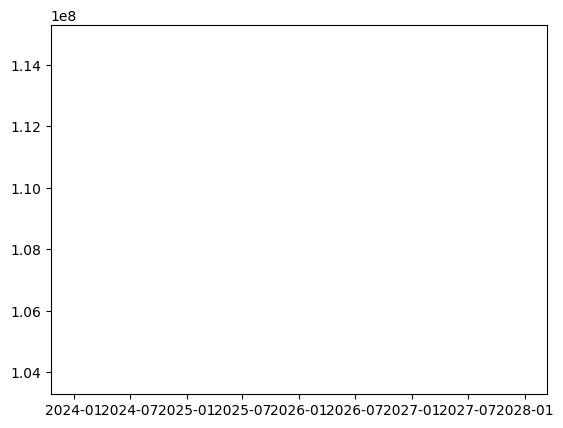

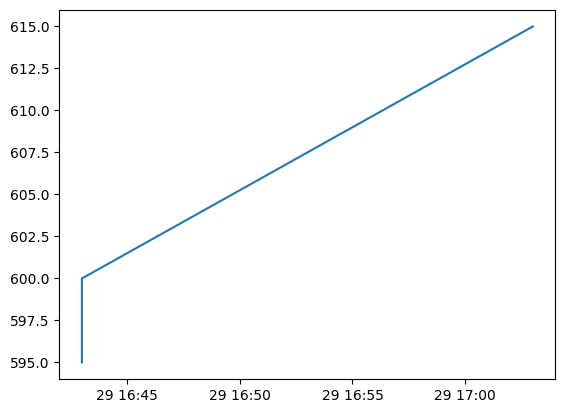

In [29]:
from analytics import *
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
#datetime last 10 minutes
end_date = datetime.now()
start_date = end_date - timedelta(minutes=500)

print(start_date, end_date)

online_deltas, exp_deltas, time_online, time_exp = report_char_between(
    db, "Mariano Fegolexpatrocina", start_date, end_date
)

print("Experience Deltas:", exp_deltas)
print("Online Time Deltas:", online_deltas)

#cumulative sum
import numpy as np
exp_deltas = np.cumsum(exp_deltas)
online_deltas = np.cumsum(online_deltas)


# Plot experience
plt.plot(time_exp, exp_deltas)
plt.show()

# Plot online time
plt.plot(time_online, online_deltas)
plt.show()